In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv("Airline_customer_satisfaction.csv")

In [41]:
data.shape

(129880, 23)

In [42]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [43]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [44]:
data.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5398
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

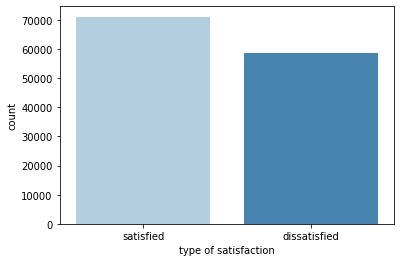

In [46]:
sns.countplot(x='satisfaction', data=data, palette='Blues')
plt.xlabel('type of satisfaction')
plt.show()

In [47]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [48]:
Delay = ['Arrival Delay in Minutes','Departure Delay in Minutes']

In [49]:
def convert_delay_to_binary(delay):
    if delay > 0:
        return 1
    else:
        return 0

delay_columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']
for col in delay_columns:
    data[col] = data[col].apply(convert_delay_to_binary)

In [50]:
data['satisfaction'].replace({'dissatisfied': 0,
                              'satisfied':1},inplace=True)

data['Gender'].replace({'Female': 0,
                              'Male':1},inplace=True)

data['Customer Type'].replace({'disloyal Customer': 0,
                              'Loyal Customer':1},inplace=True)

data['Type of Travel'].replace({'Business travel': 0,
                              'Personal Travel':1},inplace=True)

data['Class'].replace({'Business': 0,
                        'Eco':1,
                      'Eco Plus':2},inplace=True)

In [51]:
data['satisfaction'].value_counts()

1    71087
0    58793
Name: satisfaction, dtype: int64

In [52]:
data.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5398
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes              2
Arrival Delay in Minutes                2
dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['satisfaction'] = label_encoder.fit_transform(data['satisfaction'].astype(str))

In [54]:
features = ['Gender','Customer Type','Age','Type of Travel','Class','Flight Distance','Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking',
'On-board service','Leg room service','Baggage handling','Checkin service',
'Cleanliness','Online boarding','Arrival Delay in Minutes','Departure Delay in Minutes']

X = data[features]
y = data['satisfaction']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [56]:
#prediction of train data

# Instantiate logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict on train data
y_pred = lr.predict(X_train)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.7840121650754542
Precision: 0.7783268791418896
Recall: 0.8457488951881261
F1 Score: 0.8106384055892132


In [57]:
#prediction of test data
# Instantiate logistic regression model
LR = LogisticRegression()

# Fit the model to the training data
LR.fit(X_test, y_test)

# Predict on test data
Y_pred = LR.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.7993917462272867
Precision: 0.8020493712156498
Recall: 0.8435269419174247
F1 Score: 0.822265425150926


In [58]:
# Preprocess data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate logistic regression model
Logreg = LogisticRegression()

# Fit the model to the training data
Logreg.fit(X_train_scaled, y_train)

# Predict on test data
y_Pred = Logreg.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_Pred)
precision = precision_score(y_test, y_Pred)
recall = recall_score(y_test, y_Pred)
f1 = f1_score(y_test, y_Pred)

print('Logistic Regression Accuracy:', accuracy)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Recall:', recall)
print('Logistic Regression F1 Score:', f1)


Logistic Regression Accuracy: 0.8311903295349553
Logistic Regression Precision: 0.8475682504035371
Logistic Regression Recall: 0.8451364590622813
Logistic Regression F1 Score: 0.8463506079400118


# Hyper Parameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
hyperparameters = {'C': [0.01, 0.1,0.2,1, 10],
                   'penalty': ['l1', 'l2']}

In [61]:
grid_search = GridSearchCV(LR, hyperparameters, cv=5)

In [62]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.2, 1, 10], 'penalty': ['l1', 'l2']})

In [63]:
best_params = grid_search.best_params_

In [64]:
best_logistic_reg = LogisticRegression(**best_params)
best_logistic_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.2)

In [65]:
y_train_pred=best_logistic_reg.predict(X_train_scaled)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.7840121650754542
Precision: 0.7783268791418896
Recall: 0.8457488951881261
F1 Score: 0.8106384055892132


In [66]:
y_train_pred=best_logistic_reg.predict(X_test_scaled)
y_Pred = best_logistic_reg.predict(X_test_scaled)

In [67]:
print('Logistic Regression Accuracy:', accuracy)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Recall:', recall)
print('Logistic Regression F1 Score:', f1)

Logistic Regression Accuracy: 0.7840121650754542
Logistic Regression Precision: 0.7783268791418896
Logistic Regression Recall: 0.8457488951881261
Logistic Regression F1 Score: 0.8106384055892132
